## data

In [2]:
import numpy as np
import pandas as pd

# Replace 'filename.txt' with the name of your text file
df = pd.read_csv('all_0.txt', delimiter='\t')
drops = [k for k in df.keys() if "Value"  not in k and "Time" not in k]
df.drop(drops, axis=1, inplace=True)
df.fillna(0, inplace=True)
df.drop('L3-PAM9-PM320:Energy Value', axis=1, inplace=True)
energies = [k for k in df.keys() if "Value"  in k and "Time" not in k]
for e in energies:
    df[e] = df[e].apply(lambda x: max(x, 0))
first_nonzero_row = 152080
last_nonzero_row = 1331750
df_w = df.iloc[first_nonzero_row:last_nonzero_row+1]
group_PD  = ['L3-PD1M1-PM314:Energy Value',
 'L3-PD3M1-PM317:Energy Value',
 'L3-PD4M1-PM319:Energy Value',
 'L3-PD2M1-PM316:Energy Value']
group_PD1 = ['L3-PD1M1-PM314:Energy Value']
group_PD2 = ['L3-PD2M1-PM316:Energy Value']
group_PD3 = ['L3-PD3M1-PM317:Energy Value']
group_PD4 = ['L3-PD4M1-PM319:Energy Value']

group_PTM = ['L3-PTM1-PM321:Energy Value']

group_PCM = ['L3-PCM4-PM310:Energy Value', 'L3-PCM2-PM312:Energy Value']
group_PCM2 = ['L3-PCM2-PM312:Energy Value']
group_PCM4 = ['L3-PCM4-PM310:Energy Value']

group_OUT = ['L3-SBW4-PM311:Energy Value']

group_PAM = ['L3-PAM12-PM318:Energy Value', 'L3-PAM11-PM322:Energy Value']
group_PAM12 = ['L3-PAM12-PM318:Energy Value']
group_PAM11 = ['L3-PAM11-PM322:Energy Value']

group_PFM = ["L3-PFM11-PM302:Energy Value"]
group_GPL = ["L3-GPL-PM306:Energy Value"] # input 
group_SAM = ["L3-SAM7A-PM307:Energy Value"]   #sam da rimuovere

group_SPM = ["L3-SPM10-PM304:Energy Value", "L3-SPM3-PM308:Energy Value"]
group_SPM10 = ["L3-SPM10-PM304:Energy Value"]
group_SPM3 = ["L3-SPM3-PM308:Energy Value"]

group_SAM2 = ["L3-SAM17-PM309:Energy Value"]
group_PAP = ["L3-PAP1-PM313:Energy Value"]
group_PAM2 = ["L3-PAM5-PM315:Energy Value"]
group_ALPHA = ["L3-ALPHA-PM323:Energy Value"]
group_PFM2 = ["L3-PFM8-PM301:Energy Value"]

group_SFM = ["L3-SFM2-PM305:Energy Value", "L3-SFM6-PM303:Energy Value"]
group_SFM2 = ["L3-SFM2-PM305:Energy Value"]
group_SFM6 = ["L3-SFM6-PM303:Energy Value"]

group_Spider = ['L3-SBDP-SPIDER:FWHM Value']

groups = [   group_PD1,  
            group_PD2, 
            group_PD3, 
            group_PD4, 
            group_PTM, 
            group_PCM2, 
            group_PCM4, 
            group_PAM12, 
            group_PAM11, 
            group_PFM, 
            group_GPL, 
            group_SAM, 
            group_SPM10, 
            group_SPM3, 
            group_SAM2, 
            group_PAP, 
            group_PAM2, 
            group_ALPHA, 
            group_PFM2, 
            group_SFM2, 
            group_SFM6
        ]
        

## Correlation

In [2]:
import numpy as np

In [3]:
import pandas as pd

# Replace 'filename.txt' with the name of your text file
df = pd.read_csv('all_0.txt', delimiter='\t')

In [4]:
drops = [k for k in df.keys() if "Value"  not in k and "Time" not in k]
df.drop(drops, axis=1, inplace=True)
df.fillna(0, inplace=True)
df.drop('L3-PAM9-PM320:Energy Value', axis=1, inplace=True)
energies = [k for k in df.keys() if "Value"  in k and "Time" not in k]
for e in energies:
    df[e] = df[e].apply(lambda x: max(x, 0))

In [ ]:
first_nonzero_row = 152080
last_nonzero_row = 1331750

In [ ]:
df_w = df.iloc[first_nonzero_row:last_nonzero_row+1]

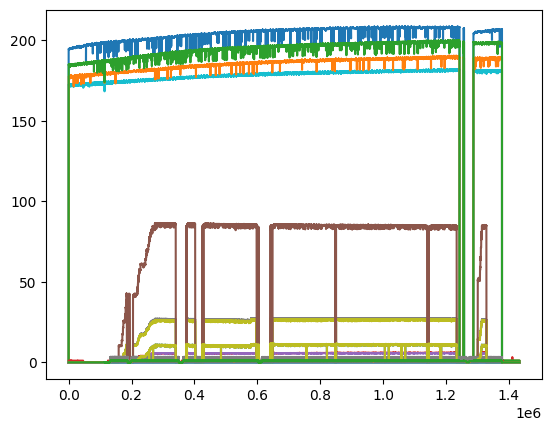

In [ ]:
import matplotlib.pyplot as plt

for en in energies:
    df[en].plot()
plt.show()

In [ ]:
def plot_df(data):
    for en in data.keys():
        df[en].plot()

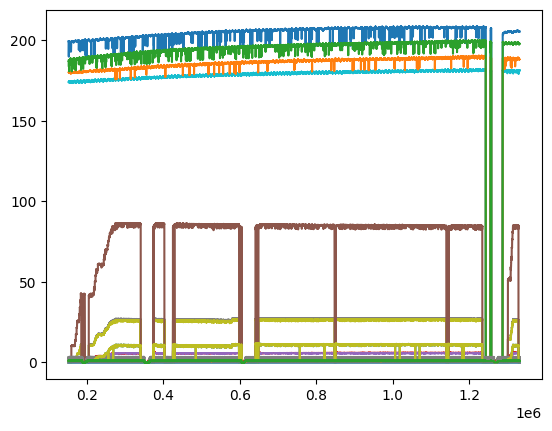

In [ ]:
import matplotlib.pyplot as plt

for en in energies:
    df_w[en].plot()
plt.show()

<Axes: >

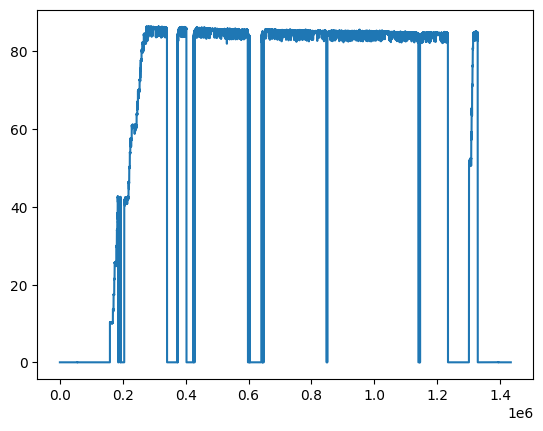

In [ ]:
df['L3-PTM1-PM321:Energy Value'].plot()

In [ ]:
from sklearn.cluster import KMeans

# Replace 'n_clusters' with the number of clusters you want to create
n_clusters = 2

# Create a DataFrame with only the 'L3-SBW4-PM311:Energy Value' column
X = df[['L3-PTM1-PM321:Energy Value']]

# Create a KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Add a new column to the DataFrame with the cluster labels
df['cluster'] = kmeans.labels_

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
diff = df['L3-PTM1-PM321:Energy Value'].diff()

In [ ]:
spikes = diff.sort_values()[::-1].index

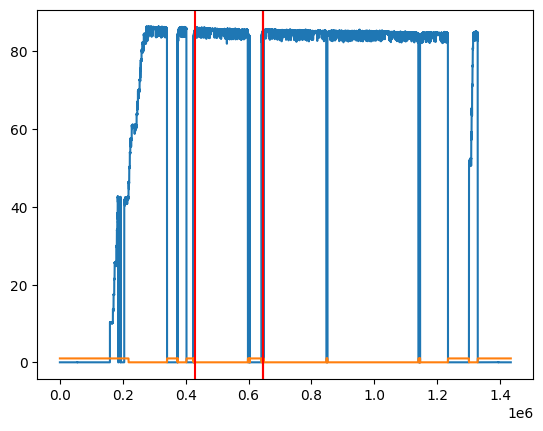

In [ ]:
df['L3-PTM1-PM321:Energy Value'].plot()
df['cluster'].plot()

for i in range(1,4):  
    plt.axvline(x=spikes[i], color='red')

# Plot a line chart of the values in the row
plt.show()

In [ ]:
df_w[10000:]

,Time,L3-SBW4-PM311:Energy Value,L3-ALPHA-PM323:Energy Value,L3-GPL-PM306:Energy Value,L3-PAM11-PM322:Energy Value,L3-PAM12-PM318:Energy Value,L3-PAM5-PM315:Energy Value,L3-PAP1-PM313:Energy Value,L3-PCM2-PM312:Energy Value,L3-PCM4-PM310:Energy Value,...,L3-PFM11-PM302:Energy Value,L3-PFM8-PM301:Energy Value,L3-PTM1-PM321:Energy Value,L3-SAM17-PM309:Energy Value,L3-SAM7A-PM307:Energy Value,L3-SBW4-PM311:Energy Value.1,L3-SFM2-PM305:Energy Value,L3-SFM6-PM303:Energy Value,L3-SPM10-PM304:Energy Value,L3-SPM3-PM308:Energy Value
162080,2023-10-02 14:22:35.566814899,0.159350,0.009094,1.462053,0.74,0.256023,0.011618,0.011842,1.1508,1.3035,...,1.03026,0.008079,10.261,0.223219,3.323557,0.159350,0.001212,0.000922,0.620712,0.814592
162081,2023-10-02 14:22:35.566970825,0.159350,0.009094,1.462053,0.74,0.256023,0.011618,0.011842,1.1508,1.3035,...,1.02300,0.008079,10.261,0.223219,3.323557,0.159350,0.001212,0.000922,0.620712,0.814592
162082,2023-10-02 14:22:35.567110062,0.159350,0.009094,1.462053,0.74,0.256023,0.011618,0.012007,1.1508,1.3035,...,1.02300,0.008079,10.261,0.223219,3.323557,0.159350,0.001212,0.000922,0.620712,0.814592
162083,2023-10-02 14:22:35.567388058,0.159350,0.009094,1.462053,0.74,0.256332,0.011618,0.012007,1.1508,1.3035,...,1.02300,0.008079,10.261,0.223219,3.323557,0.159350,0.001212,0.000922,0.620712,0.814592
162084,2023-10-02 14:22:35.567531109,0.159350,0.009094,1.462053,0.74,0.256332,0.011618,0.012007,1.1424,1.3035,...,1.02300,0.008079,10.261,0.223219,3.323557,0.159350,0.001212,0.000922,0.620712,0.814592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331746,2023-10-02 17:04:53.934019089,0.005365,0.008936,1.456807,0.00,0.000000,0.000322,0.002163,0.0000,0.1343,...,0.00418,0.000081,0.000,0.000000,3.275703,0.005365,0.001240,0.001081,0.605975,0.803746
1331747,2023-10-02 17:04:53.934155941,0.005365,0.008936,1.456807,0.00,0.000000,0.000322,0.002163,0.0000,0.1343,...,0.00418,0.000308,0.000,0.000000,3.275703,0.005365,0.001240,0.001081,0.605975,0.803746
1331748,2023-10-02 17:04:53.934317112,0.005365,0.008936,1.456807,0.00,0.000000,0.000322,0.002163,0.0000,0.1343,...,0.00176,0.000308,0.000,0.000000,3.275703,0.005365,0.001240,0.001081,0.605975,0.803746
1331749,2023-10-02 17:04:53.934466839,0.005365,0.008936,1.456807,0.00,0.000000,0.000322,0.002287,0.0000,0.1343,...,0.00176,0.000308,0.000,0.000000,3.275703,0.005365,0.001240,0.001081,0.605975,0.803746


In [ ]:
group_PD  = ['L3-PD1M1-PM314:Energy Value',
 'L3-PD3M1-PM317:Energy Value',
 'L3-PD4M1-PM319:Energy Value',
 'L3-PD2M1-PM316:Energy Value']
group_PD1 = ['L3-PD1M1-PM314:Energy Value']
group_PD2 = ['L3-PD2M1-PM316:Energy Value']
group_PD3 = ['L3-PD3M1-PM317:Energy Value']
group_PD4 = ['L3-PD4M1-PM319:Energy Value']

group_PTM = ['L3-PTM1-PM321:Energy Value']

group_PCM = ['L3-PCM4-PM310:Energy Value', 'L3-PCM2-PM312:Energy Value']
group_PCM2 = ['L3-PCM2-PM312:Energy Value']
group_PCM4 = ['L3-PCM4-PM310:Energy Value']

group_OUT = ['L3-SBW4-PM311:Energy Value']

group_PAM = ['L3-PAM12-PM318:Energy Value', 'L3-PAM11-PM322:Energy Value']
group_PAM12 = ['L3-PAM12-PM318:Energy Value']
group_PAM11 = ['L3-PAM11-PM322:Energy Value']

group_PFM = ["L3-PFM11-PM302:Energy Value"]
group_GPL = ["L3-GPL-PM306:Energy Value"] # input 
group_SAM = ["L3-SAM7A-PM307:Energy Value"]   #sam da rimuovere

group_SPM = ["L3-SPM10-PM304:Energy Value", "L3-SPM3-PM308:Energy Value"]
group_SPM10 = ["L3-SPM10-PM304:Energy Value"]
group_SPM3 = ["L3-SPM3-PM308:Energy Value"]

group_SAM2 = ["L3-SAM17-PM309:Energy Value"]
group_PAP = ["L3-PAP1-PM313:Energy Value"]
group_PAM2 = ["L3-PAM5-PM315:Energy Value"]
group_ALPHA = ["L3-ALPHA-PM323:Energy Value"]
group_PFM2 = ["L3-PFM8-PM301:Energy Value"]

group_SFM = ["L3-SFM2-PM305:Energy Value", "L3-SFM6-PM303:Energy Value"]
group_SFM2 = ["L3-SFM2-PM305:Energy Value"]
group_SFM6 = ["L3-SFM6-PM303:Energy Value"]

groups = [   group_PD1,  
            group_PD2, 
            group_PD3, 
            group_PD4, 
            group_PTM, 
            group_PCM2, 
            group_PCM4, 
            group_PAM12, 
            group_PAM11, 
            group_PFM, 
            group_GPL, 
            group_SAM, 
            group_SPM10, 
            group_SPM3, 
            group_SAM2, 
            group_PAP, 
            group_PAM2, 
            group_ALPHA, 
            group_PFM2, 
            group_SFM2, 
            group_SFM6
        ]
        

In [285]:
corrs = {}
for gr in groups:
    corr = df_w[group_OUT[0]].corr(df_w[gr[0]])
    corrs[gr[0]] = corr

In [296]:
list(zip(sorted(corrs, key=lambda x: corrs[x]), sorted(corrs.values())))

[('L3-SFM6-PM303:Energy Value', 0.06446637050307413),
 ('L3-SAM7A-PM307:Energy Value', 0.13066546977602098),
 ('L3-SFM2-PM305:Energy Value', 0.15496218477279117),
 ('L3-PFM11-PM302:Energy Value', 0.17758146176785816),
 ('L3-PFM8-PM301:Energy Value', 0.25704227588700884),
 ('L3-SPM3-PM308:Energy Value', 0.3430839436463561),
 ('L3-SPM10-PM304:Energy Value', 0.3545657839612507),
 ('L3-GPL-PM306:Energy Value', 0.36203286828314657),
 ('L3-PD1M1-PM314:Energy Value', 0.3776983054933384),
 ('L3-PD2M1-PM316:Energy Value', 0.3851182308968506),
 ('L3-PD3M1-PM317:Energy Value', 0.38593848338354053),
 ('L3-PD4M1-PM319:Energy Value', 0.39027932102333124),
 ('L3-ALPHA-PM323:Energy Value', 0.7710043691232522),
 ('L3-SAM17-PM309:Energy Value', 0.8360089254661246),
 ('L3-PAM11-PM322:Energy Value', 0.9599600125022336),
 ('L3-PTM1-PM321:Energy Value', 0.9622771585345046),
 ('L3-PCM2-PM312:Energy Value', 0.9739133364208762),
 ('L3-PCM4-PM310:Energy Value', 0.9739208646163002),
 ('L3-PAM5-PM315:Energy Value

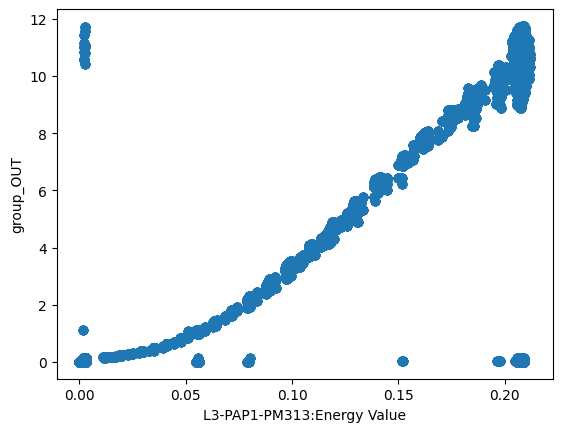

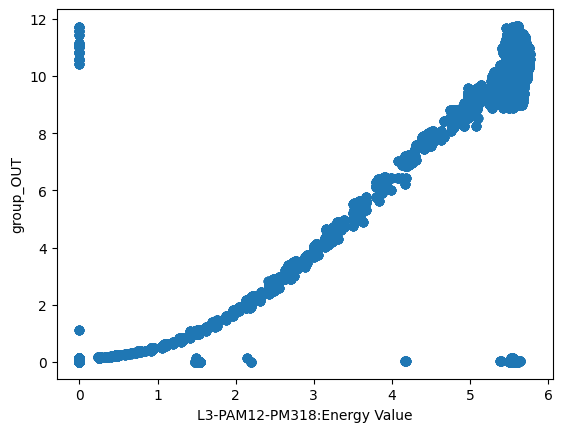

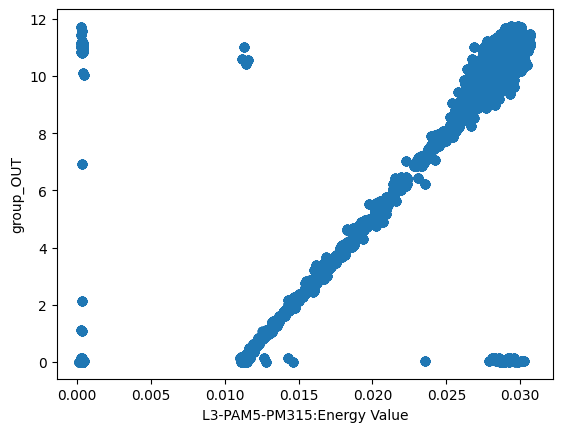

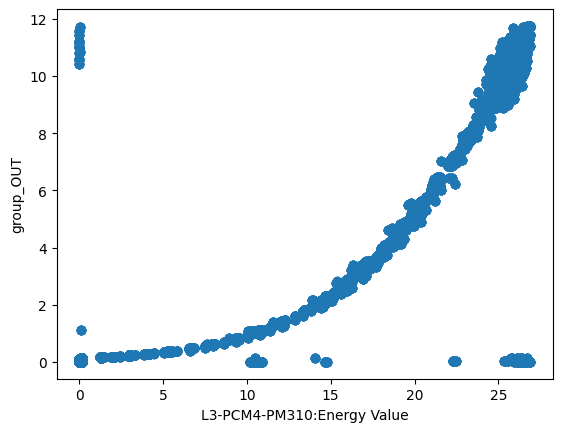

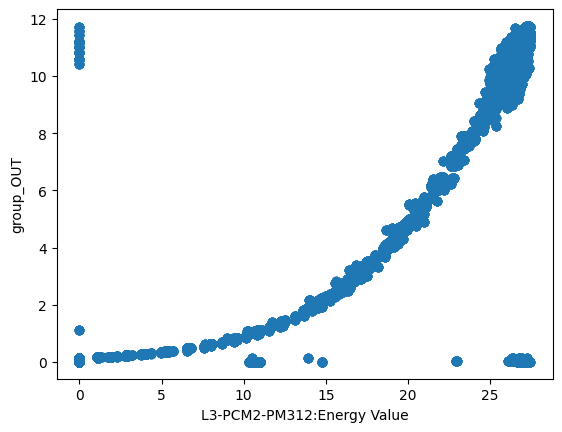

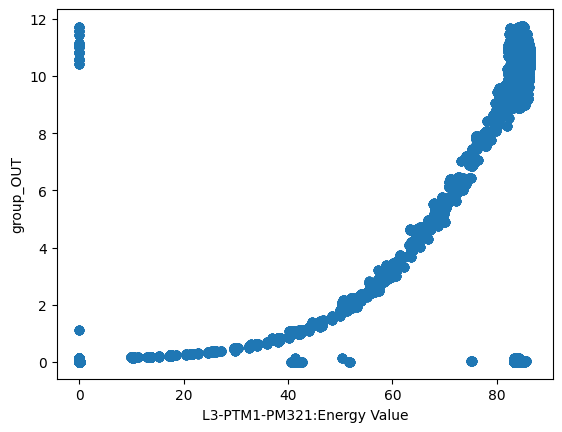

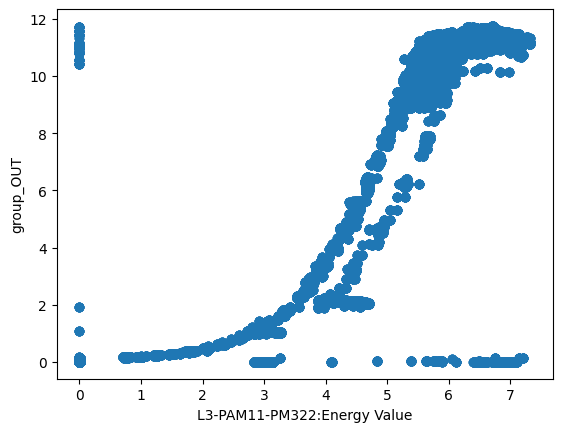

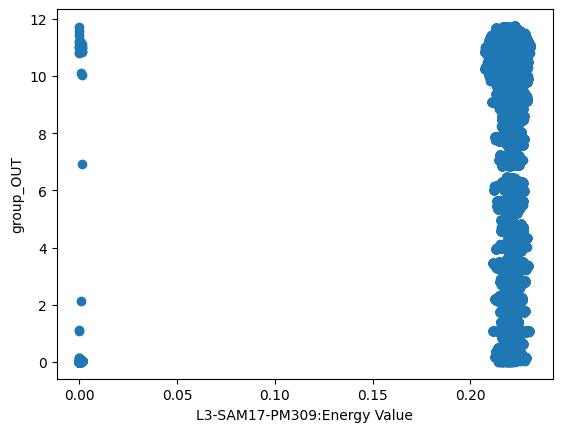

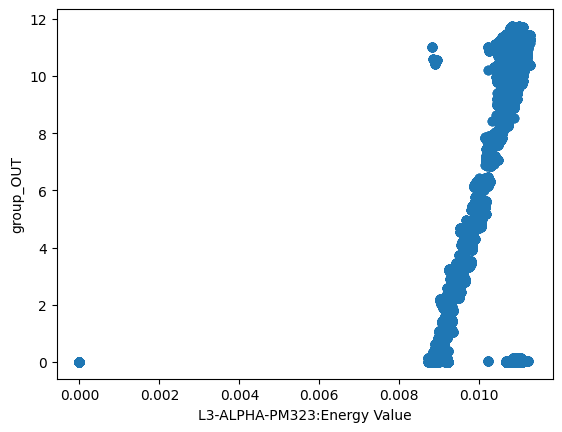

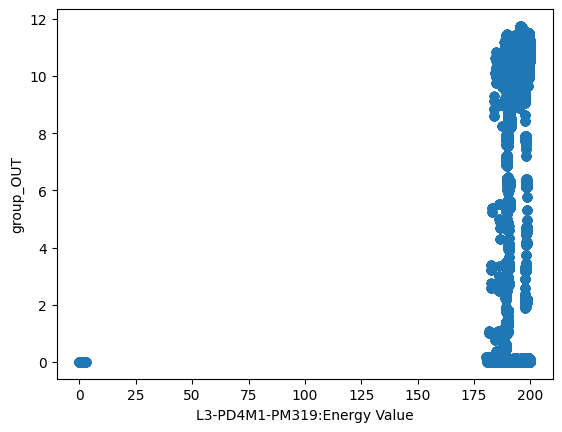

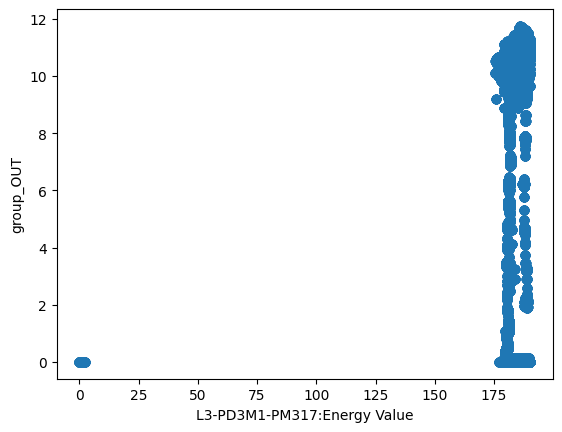

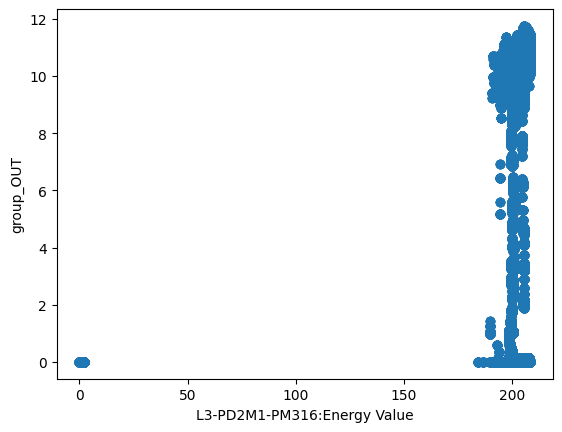

In [301]:
import matplotlib.pyplot as plt

for gr in sorted(corrs, key=lambda x: corrs[x])[:8:-1]:
    plt.scatter(df_w[gr], df_w[group_OUT])

    # Add labels to the axes
    plt.xlabel(gr)
    plt.ylabel('group_OUT')

    # Display the plot
    plt.show()

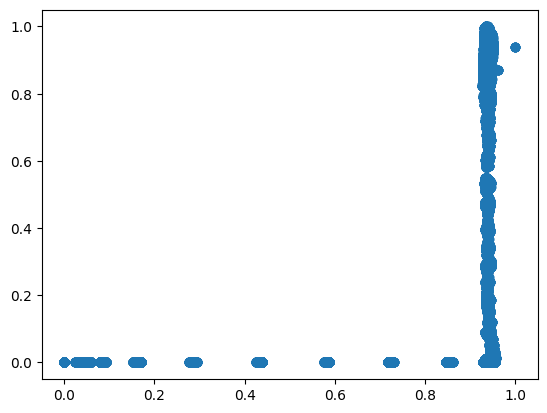

In [322]:
from sklearn.preprocessing import MinMaxScaler

# Replace 'group_GPL' and 'group_OUT' with the names of the columns you want to normalize

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the data in the specified columns
data = scaler.fit_transform(df_w[group_GPL + group_OUT])

x = data[:,0]
y = data[:,1]

plt.scatter(x, y)

<Axes: >

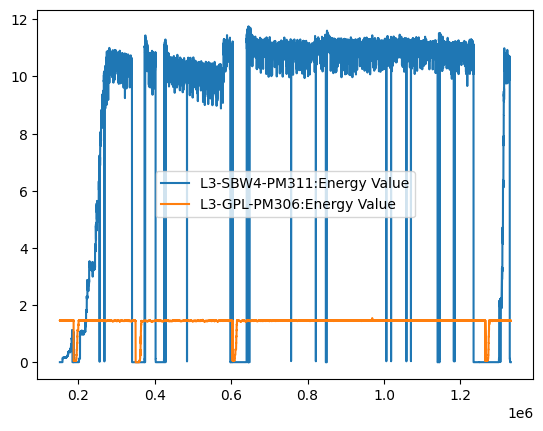

In [310]:
df_w[group_OUT + group_GPL].plot()

<Axes: >

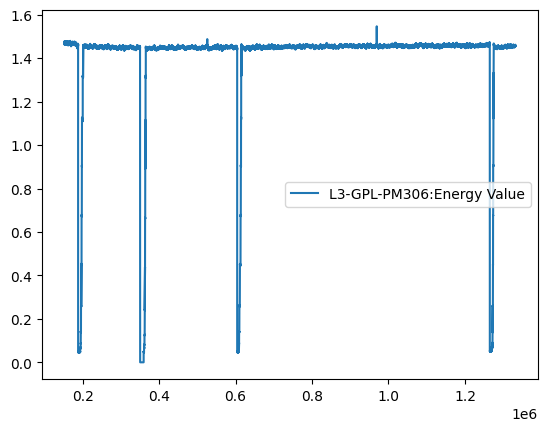

In [323]:
df_w[group_GPL].plot()

In [311]:
df_w[group_GPL].describe()

,L3-GPL-PM306:Energy Value
count,1.179671e+06
mean,1.404246e+00
std,2.483562e-01
min,0.000000e+00
25%,1.448612e+00
50%,1.452744e+00
75%,1.456712e+00
max,1.546583e+00


In [230]:
df.describe().loc['mean'].sort_values()

L3-SFM6-PM303:Energy Value        0.000845
L3-SFM2-PM305:Energy Value        0.001155
L3-PFM8-PM301:Energy Value        0.006913
L3-ALPHA-PM323:Energy Value       0.007710
L3-PAM5-PM315:Energy Value        0.018906
L3-PAP1-PM313:Energy Value        0.133179
L3-SAM17-PM309:Energy Value       0.152105
L3-SPM10-PM304:Energy Value       0.512969
L3-SPM3-PM308:Energy Value        0.743881
L3-PFM11-PM302:Energy Value       0.897570
L3-GPL-PM306:Energy Value         1.223684
L3-SAM7A-PM307:Energy Value       2.022368
L3-PAM12-PM318:Energy Value       3.597154
L3-PAM11-PM322:Energy Value       3.786353
L3-SBW4-PM311:Energy Value.1      6.751873
L3-SBW4-PM311:Energy Value        6.751873
L3-PCM4-PM310:Energy Value       16.947739
L3-PCM2-PM312:Energy Value       17.314519
L3-PTM1-PM321:Energy Value       55.392624
L3-PD1M1-PM314:Energy Value     166.135295
L3-PD3M1-PM317:Energy Value     172.707064
L3-PD4M1-PM319:Energy Value     181.345348
L3-PD2M1-PM316:Energy Value     190.509670
Name: mean,

In [232]:
df_PD = df[group_PD + ["Time"]].copy()
df_PTM = df[group_PTM + ["Time"]].copy()
df_PCM = df[group_PCM + ["Time"]].copy()
df_OUT = df[group_OUT + ["Time"]].copy()
df_PAM = df[group_PAM + ["Time"]].copy()
df_PFM = df[group_PFM + ["Time"]].copy()
df_GPL = df[group_GPL + ["Time"]].copy()
df_SAM = df[group_SAM + ["Time"]].copy()
df_SPM = df[group_SPM + ["Time"]].copy()
df_SAM2 = df[group_SAM2 + ["Time"]].copy()
df_PAP = df[group_PAP + ["Time"]].copy()
df_PAM2 = df[group_PAM2 + ["Time"]].copy()
df_ALPHA = df[group_ALPHA + ["Time"]].copy()
df_PFM2 = df[group_PFM2 + ["Time"]].copy()
df_SFM = df[group_SFM + ["Time"]].copy()

In [278]:
df_w[group_OUT[0]]

152080     0.005365
152081     0.005365
152082     0.005365
152083     0.005365
152084     0.005365
             ...   
1331746    0.005365
1331747    0.005365
1331748    0.005365
1331749    0.005365
1331750    0.005365
Name: L3-SBW4-PM311:Energy Value, Length: 1179671, dtype: float64

In [279]:
corr = df_w[group_OUT[0]].corr(df_w[group_PAM[0]])

# Display the correlation coefficient
print('Correlation coefficient:', corr)

Correlation coefficient: 0.9854297845533577


<Axes: >

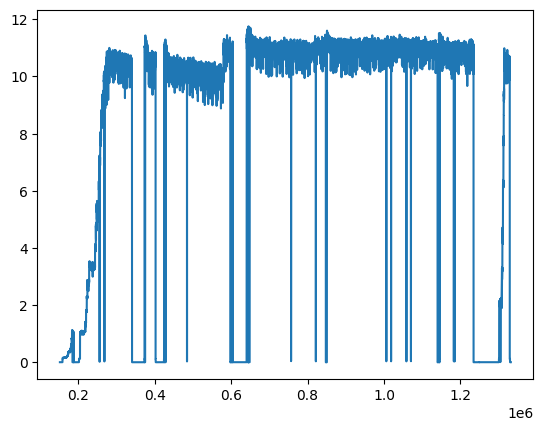

In [273]:
df[group_OUT].iloc[first_nonzero_row:last_nonzero_row+1].plot(legend=False)

<Axes: >

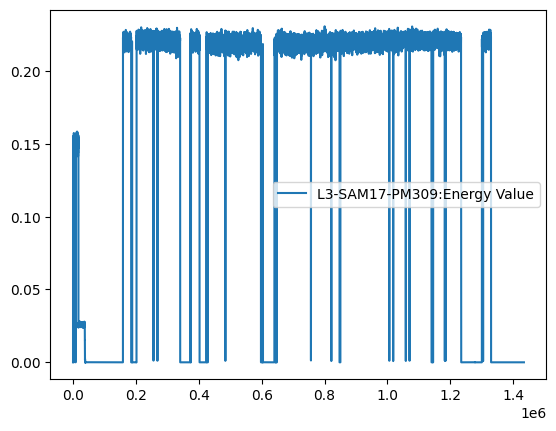

In [266]:
df[group_SAM2].plot()

<Axes: >

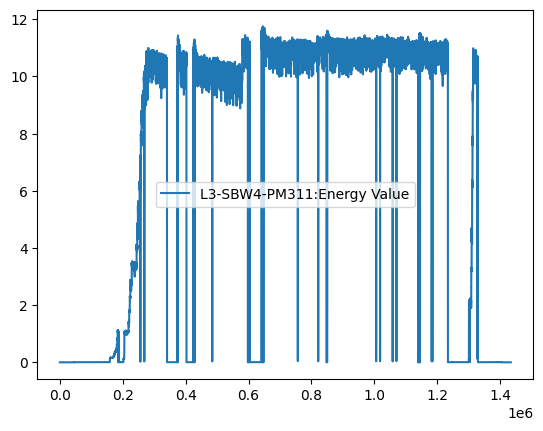

In [267]:
df[group_OUT].plot()

<Axes: >

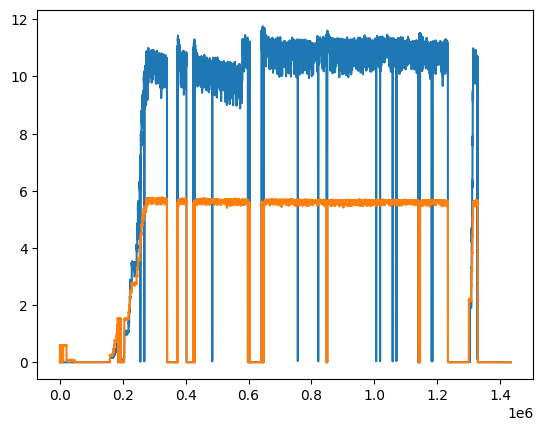

In [258]:
df[group_OUT + [group_PAM[0]] ].plot(legend=False)

<Axes: >

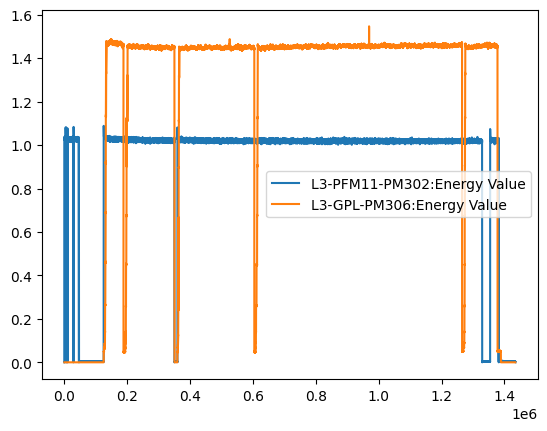

In [218]:
df_pfm_gpl_sam[ ['L3-PFM11-PM302:Energy Value', 'L3-GPL-PM306:Energy Value']].plot()

In [205]:
df.describe().loc['mean'].sort_values().index[-11:-9]

Index(['L3-PAM12-PM318:Energy Value', 'L3-PAM11-PM322:Energy Value'], dtype='object')

<Axes: >

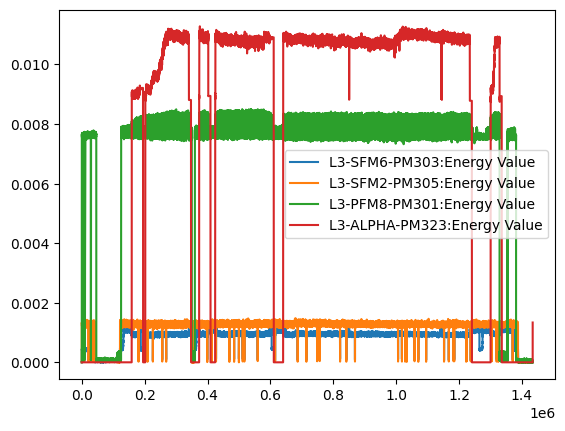

In [211]:
df[['L3-SFM6-PM303:Energy Value', "L3-SFM2-PM305:Energy Value", "L3-PFM8-PM301:Energy Value","L3-ALPHA-PM323:Energy Value"]].plot()

L3-SFM6-PM303:Energy Value        0.000845
L3-SFM2-PM305:Energy Value        0.001155
L3-PFM8-PM301:Energy Value        0.006913
L3-ALPHA-PM323:Energy Value       0.007710
L3-PAM5-PM315:Energy Value        0.018906
L3-PAP1-PM313:Energy Value        0.133179
L3-SAM17-PM309:Energy Value       0.152105
cluster                           0.348925
L3-SPM10-PM304:Energy Value       0.512969
L3-SPM3-PM308:Energy Value        0.743881
L3-PFM11-PM302:Energy Value       0.897570
L3-GPL-PM306:Energy Value         1.223684
L3-SAM7A-PM307:Energy Value       2.022368
L3-PAM12-PM318:Energy Value       3.597154
L3-PAM11-PM322:Energy Value       3.786353
L3-SBW4-PM311:Energy Value.1      6.751873
L3-SBW4-PM311:Energy Value        6.751873
L3-PCM4-PM310:Energy Value       16.947739
L3-PCM2-PM312:Energy Value       17.314519
L3-PTM1-PM321:Energy Value       55.392624
L3-PD1M1-PM314:Energy Value     166.135295
L3-PD3M1-PM317:Energy Value     172.707064
L3-PD4M1-PM319:Energy Value     181.345348
L3-PD2M1-PM

In [204]:
df.describe().loc['mean'].sort_values().index[-9]

'L3-SBW4-PM311:Energy Value.1'

In [197]:
df_PD = df[list(df.describe().loc['mean'].sort_values().index[-4:]) + ["Time"]].copy()
df_PTM = df[[df.describe().loc['mean'].sort_values().index[-5] , "Time"]].copy()
df_PCM = df[list(df.describe().loc['mean'].sort_values().index[-7:-5]) + ["Time"]].copy()
df_OUT = df[[df.describe().loc['mean'].sort_values().index[-9] , "Time"]].copy()
df_PAM = df[list(df.describe().loc['mean'].sort_values().index[-11:-9]) + ["Time"]].copy()

<Axes: >

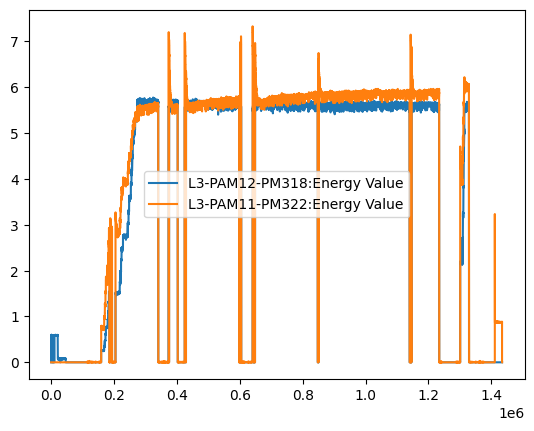

In [200]:
df_PAM.plot()

In [162]:
df_PCM

""
0
1
2
3
4
...
1434374
1434375
1434376
1434377


In [161]:
plot_df(df_PCM)

<Axes: >

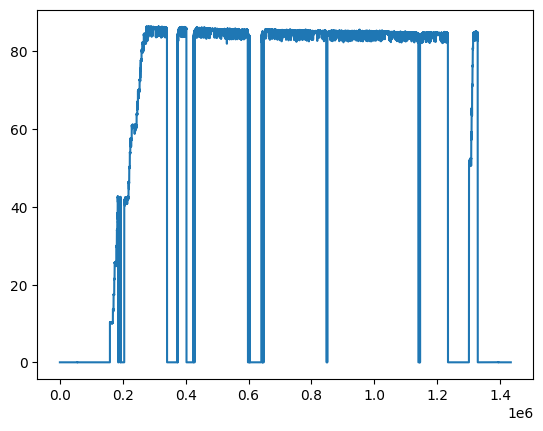

In [158]:
df_1.plot()

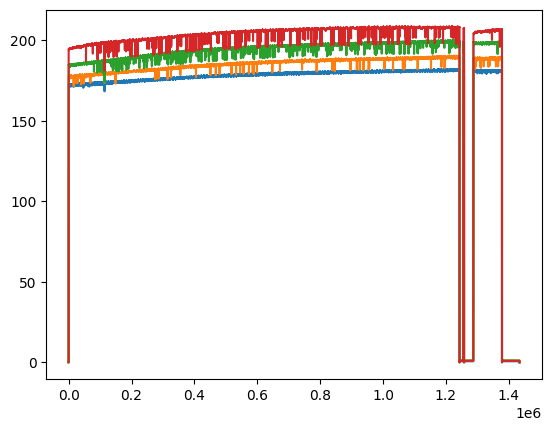

In [156]:
plot_df(df_0)

In [142]:
df 

,Time,L3-SBW4-PM311:Energy Value,L3-ALPHA-PM323:Energy Value,L3-GPL-PM306:Energy Value,L3-PAM11-PM322:Energy Value,L3-PAM12-PM318:Energy Value,L3-PAM5-PM315:Energy Value,L3-PAP1-PM313:Energy Value,L3-PCM2-PM312:Energy Value,L3-PCM4-PM310:Energy Value,...,L3-PFM8-PM301:Energy Value,L3-PTM1-PM321:Energy Value,L3-SAM17-PM309:Energy Value,L3-SAM7A-PM307:Energy Value,L3-SBW4-PM311:Energy Value.1,L3-SFM2-PM305:Energy Value,L3-SFM6-PM303:Energy Value,L3-SPM10-PM304:Energy Value,L3-SPM3-PM308:Energy Value,cluster
0,2023-10-02 13:55:51.397819519,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2023-10-02 13:57:02.254278183,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2023-10-02 13:57:03.163506031,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2023-10-02 13:57:04.034444809,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.1422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2023-10-02 13:57:04.275503159,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.1422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434374,2023-10-02 17:21:58.742321014,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1434375,2023-10-02 17:21:59.005247116,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1434376,2023-10-02 17:21:59.012682915,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1434377,2023-10-02 17:22:05.940808773,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
alto_pd_h100 = "PD"
medio_pt_55 = "PT"
simili_pcm_16 = "PCM"
out = "SBW"
simili_pam_3 = "PAM"


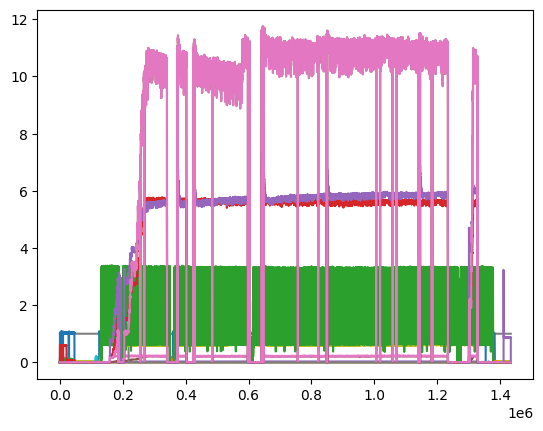

In [137]:
import matplotlib.pyplot as plt

for en in df.describe().loc['mean'].sort_values().index[:-7]:
    df[en].plot()
plt.show()

In [82]:
# Calculate the mean of each column
means = df.mean()

# Sort the columns based on their mean values
sorted_columns = means.sort_values()

c:\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


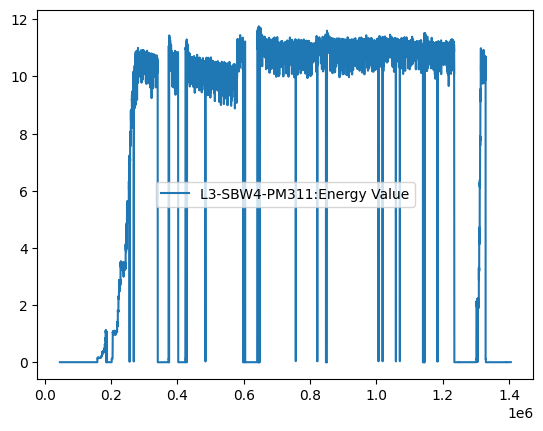

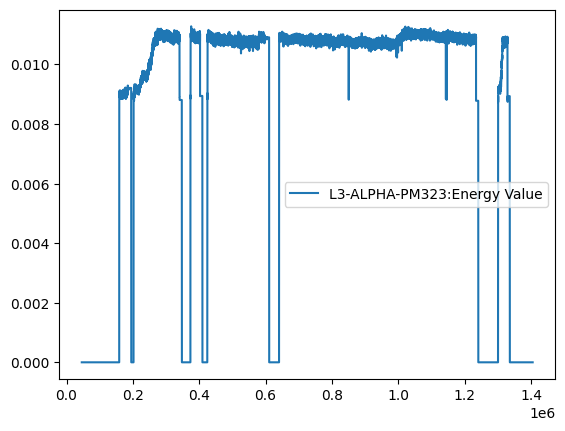

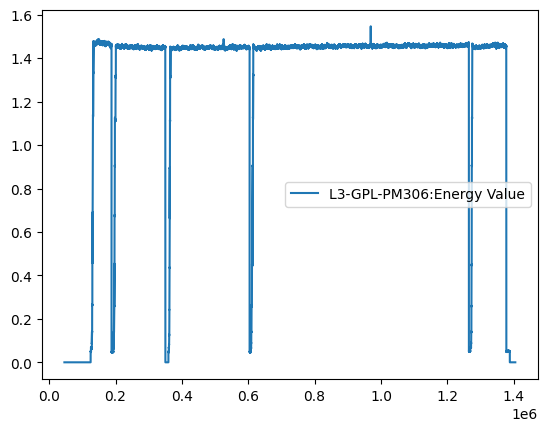

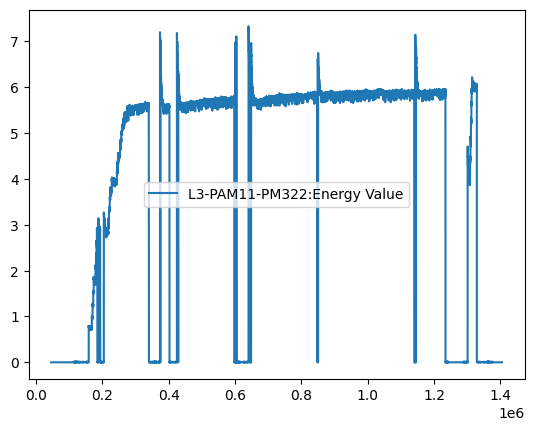

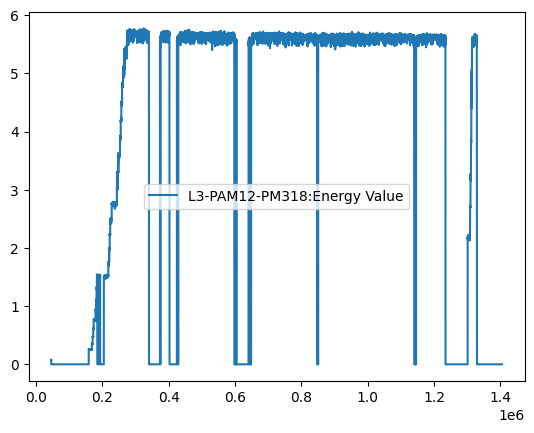

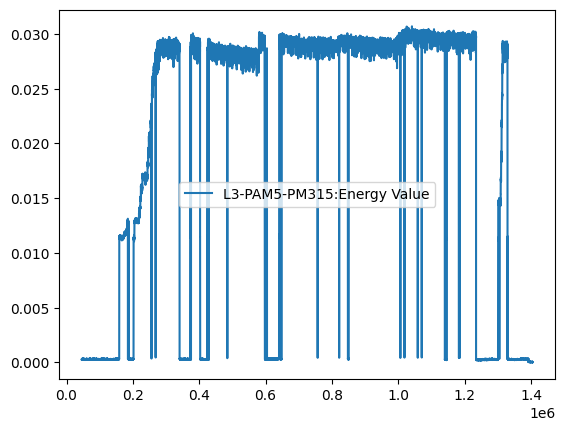

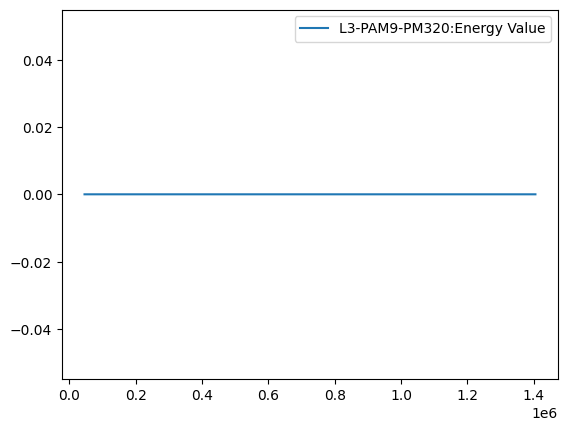

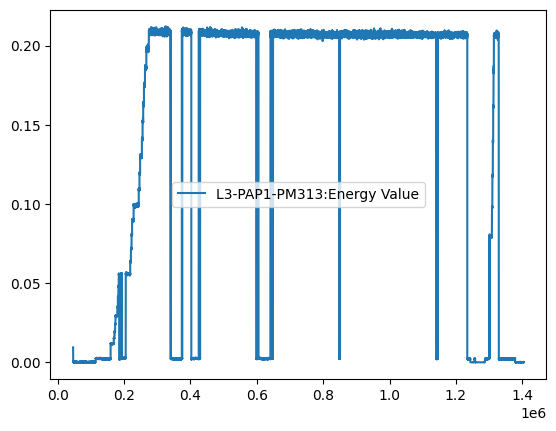

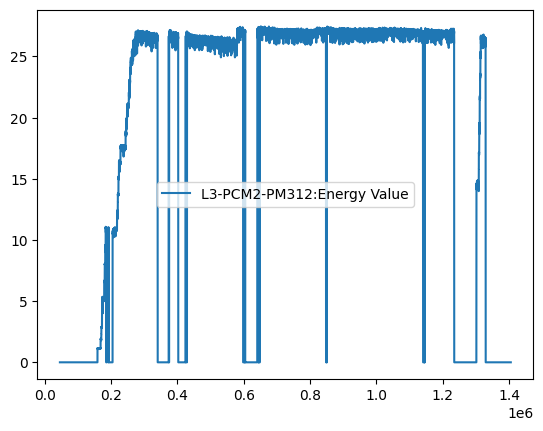

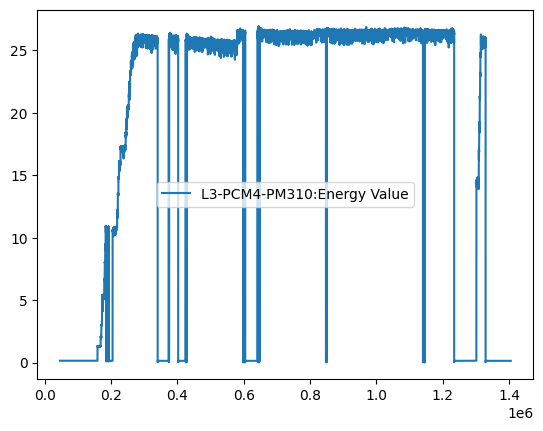

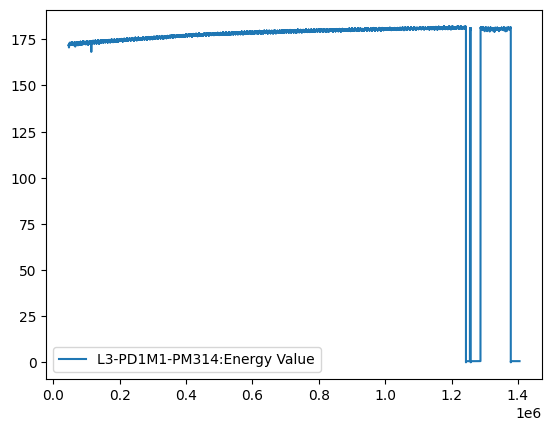

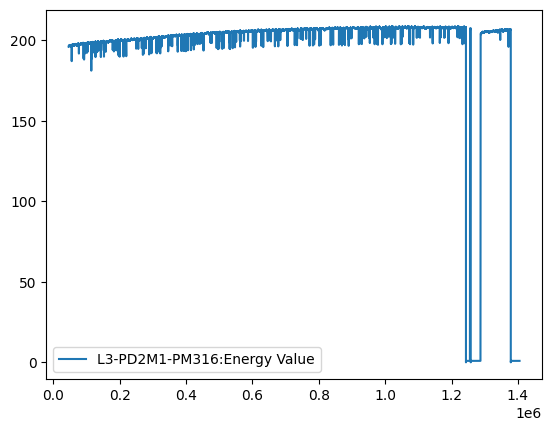

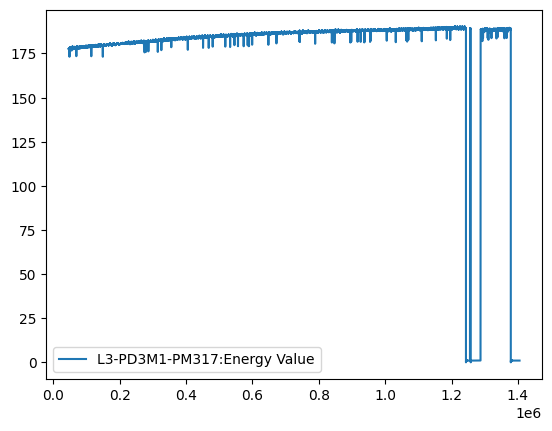

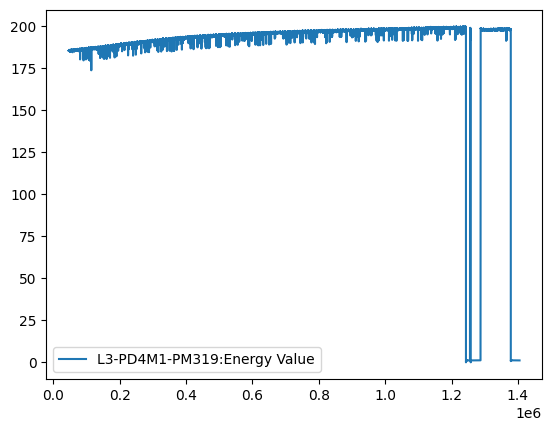

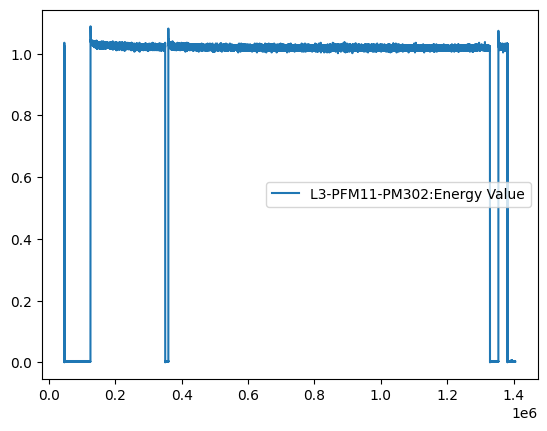

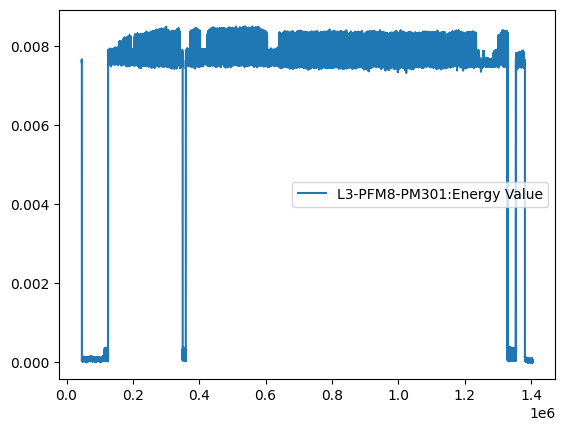

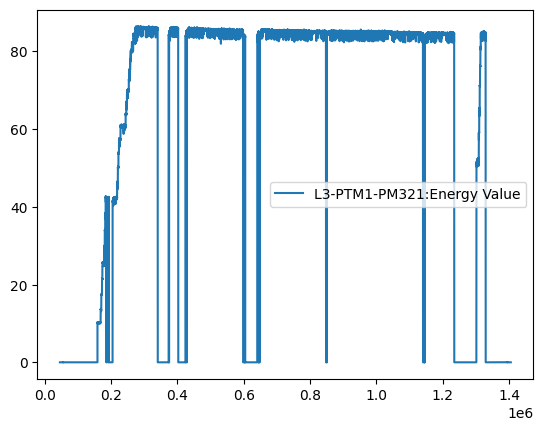

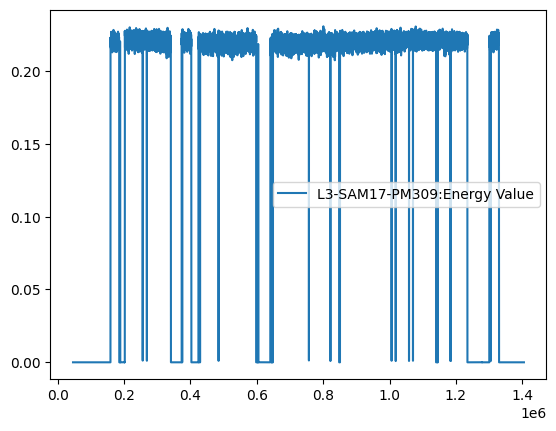

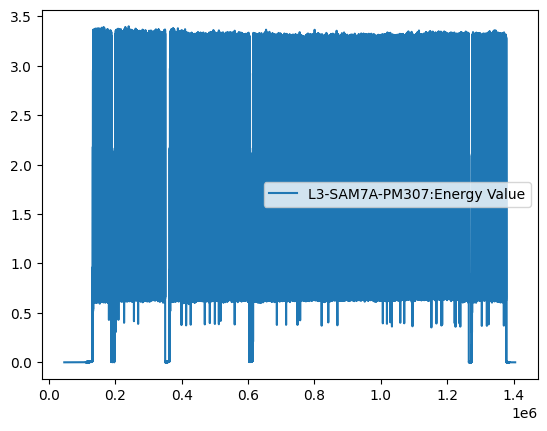

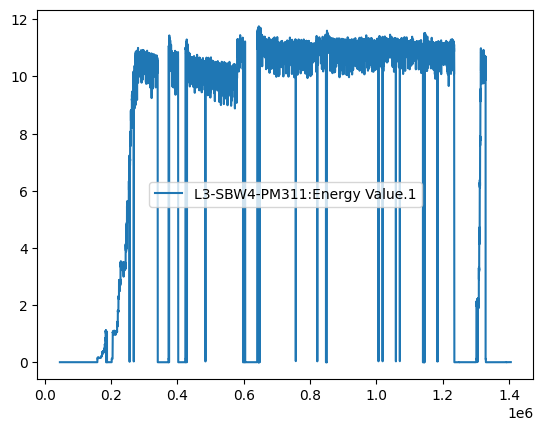

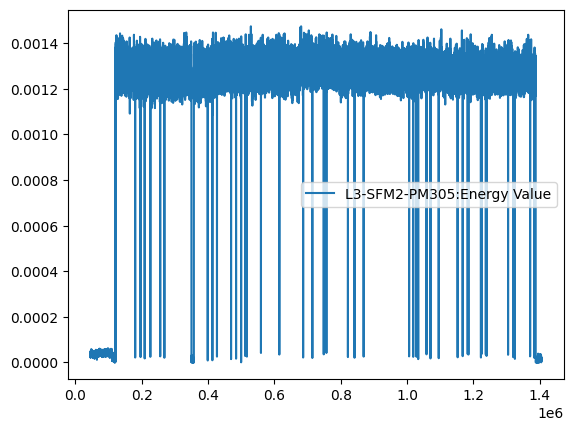

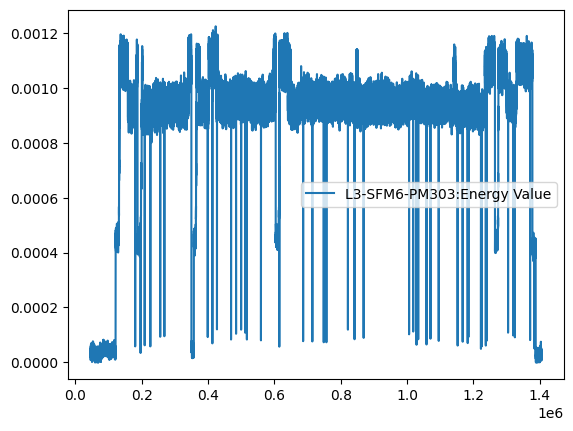

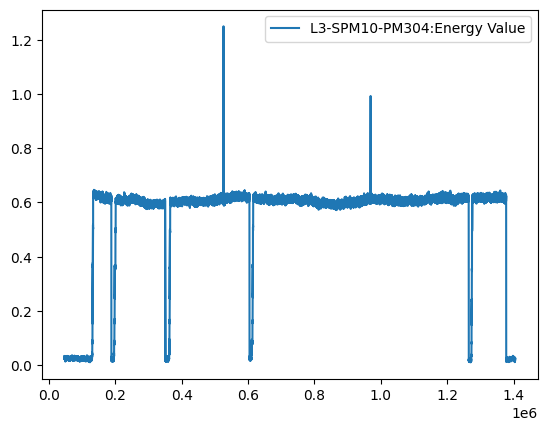

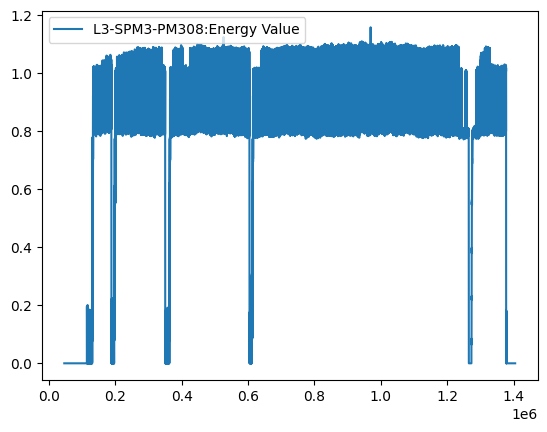

In [77]:
import matplotlib.pyplot as plt

for en in energies:
    df[[en]].plot()
plt.show()

<Axes: >

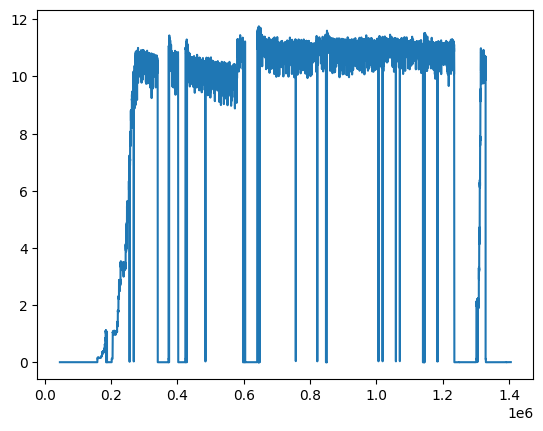

In [17]:
v

In [74]:
from sklearn.cluster import KMeans

# Replace 'n_clusters' with the number of clusters you want to create
n_clusters = 3

# Create a DataFrame with only the 'L3-SBW4-PM311:Energy Value' column
X = df[['L3-SBW4-PM311:Energy Value']]

# Create a KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Add a new column to the DataFrame with the cluster labels
df['cluster'] = kmeans.labels_

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

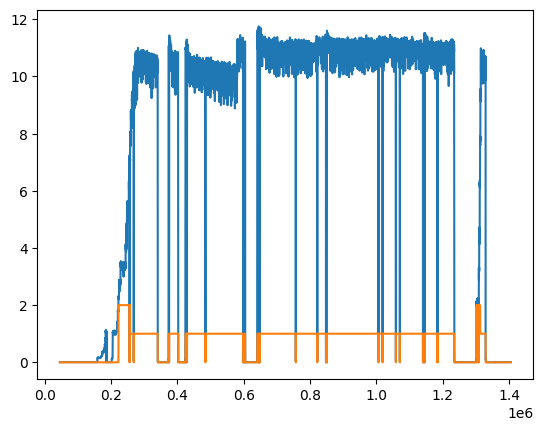

In [76]:
df['L3-SBW4-PM311:Energy Value'].plot()
df['cluster'].plot()

In [70]:
values = df.loc[df['cluster'] != 0].copy()
values.fillna(0, inplace=True)
#values.reset_index(drop=False, inplace=True)

<Axes: >

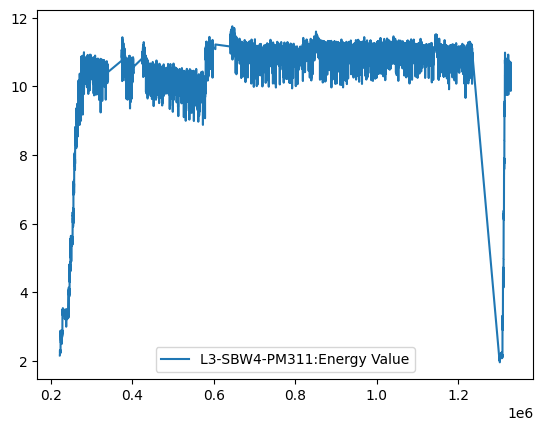

In [71]:
values[['L3-SBW4-PM311:Energy Value']].plot()

In [ ]:
from sklearn.cluster import KMeans

# Replace 'n_clusters' with the number of clusters you want to create
n_clusters = 5

# Create a DataFrame with only the 'L3-SBW4-PM311:Energy Value' column
X = values[['L3-SBW4-PM311:Energy Value']]

# Fill missing values with 0
X.fillna(0, inplace=True)

# Reset the index
X.reset_index(drop=True, inplace=True)

# Create a KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Add a new column to the DataFrame with the cluster labels
df['bins'] = kmeans.labels_
n_clusters = 5

# Create a DataFrame with only the 'L3-SBW4-PM311:Energy Value' column
X = values[['L3-SBW4-PM311:Energy Value']]

# Create a KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Add a new column to the DataFrame with the cluster labels
df['bins'] = kmeans.labels_

## Spider

In [3]:
df = pd.read_csv('spider_0.txt', delimiter='\t')
df['TimeStamp'] = pd.to_datetime(df['Time'])
df['TimeStamp'] = df['TimeStamp'].round('30L')
df = df.set_index('TimeStamp')
df['L3-SBDP-SPIDER:FWHM Value'] = pd.to_numeric(df['L3-SBDP-SPIDER:FWHM Value'], errors='coerce')


df_w['TimeStamp'] = pd.to_datetime(df_w['Time'])
df_w = df_w.set_index('TimeStamp')
resampled_df_w = df_w.drop("Time", axis=1).resample('30L').mean()

# Interpolate the missing values in the resampled DataFrame
resampled_df_w = resampled_df_w.interpolate()

# Reindex the DataFrame using the index attribute
df_spider = df[~df.index.duplicated()].reindex(resampled_df_w.index).interpolate()[["L3-SBDP-SPIDER:FWHM Value"]]

In [4]:
#merge df_spider and resampled_df_w 
df_merged = df_spider.merge(resampled_df_w, left_index=True, right_index=True)

<Axes: xlabel='TimeStamp'>

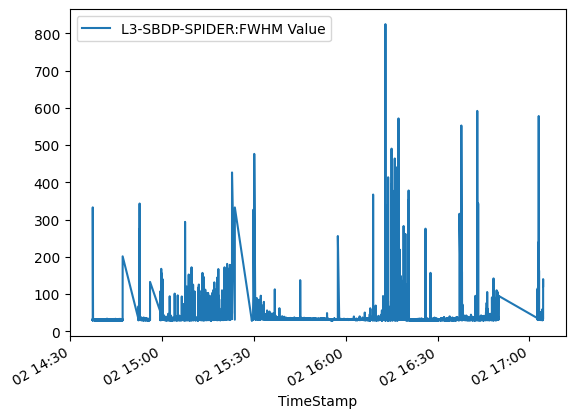

In [5]:
df_merged[df_merged[group_OUT[0]] > 10][group_Spider].plot()

In [98]:
df_merged[df_merged[group_Spider[0]] < 60].describe()

,L3-SBDP-SPIDER:FWHM Value,L3-SBW4-PM311:Energy Value,L3-ALPHA-PM323:Energy Value,L3-GPL-PM306:Energy Value,L3-PAM11-PM322:Energy Value,L3-PAM12-PM318:Energy Value,L3-PAM5-PM315:Energy Value,L3-PAP1-PM313:Energy Value,L3-PCM2-PM312:Energy Value,L3-PCM4-PM310:Energy Value,...,L3-PFM11-PM302:Energy Value,L3-PFM8-PM301:Energy Value,L3-PTM1-PM321:Energy Value,L3-SAM17-PM309:Energy Value,L3-SAM7A-PM307:Energy Value,L3-SBW4-PM311:Energy Value.1,L3-SFM2-PM305:Energy Value,L3-SFM6-PM303:Energy Value,L3-SPM10-PM304:Energy Value,L3-SPM3-PM308:Energy Value
count,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,...,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000,244824.000000
mean,33.163697,10.386216,0.010708,1.449621,5.655825,5.452140,0.028308,0.200571,26.115716,25.490138,...,1.017582,0.007767,83.076861,0.217516,2.515074,10.386216,0.001275,0.000947,0.604558,0.882682
std,4.124386,1.809129,0.001026,0.066998,0.732863,0.811309,0.003824,0.029864,3.491045,3.386152,...,0.028147,0.000328,10.597580,0.023884,0.735351,1.809129,0.000049,0.000044,0.030335,0.089096
min,13.756177,0.002687,0.000000,0.000000,0.000000,0.000000,0.000164,0.000000,0.000000,0.015800,...,0.000000,0.000038,0.000000,0.000000,0.000000,0.002687,0.000000,0.000022,0.012086,0.000000
25%,31.139574,10.438853,0.010750,1.449435,5.672200,5.606133,0.028663,0.206330,26.527200,25.802470,...,1.015740,0.007574,84.665000,0.218015,2.224444,10.438853,0.001248,0.000929,0.599673,0.809859
50%,32.089901,10.902208,0.010840,1.453143,5.799600,5.625130,0.029115,0.206969,26.888400,26.270133,...,1.018160,0.007637,84.964529,0.220134,2.615622,10.902208,0.001273,0.000947,0.606386,0.875423
75%,33.473908,11.038725,0.010930,1.456617,5.865400,5.645273,0.029463,0.207667,27.014400,26.401800,...,1.020580,0.007955,85.330000,0.222159,3.209393,11.038725,0.001301,0.000967,0.612535,0.923968
max,59.997365,11.753751,0.011280,1.535201,7.328400,5.774679,0.030685,0.212114,27.451200,26.891600,...,1.044780,0.008498,86.470000,0.230681,3.399914,11.753751,0.001473,0.001179,1.066420,1.109062


<Axes: xlabel='TimeStamp'>

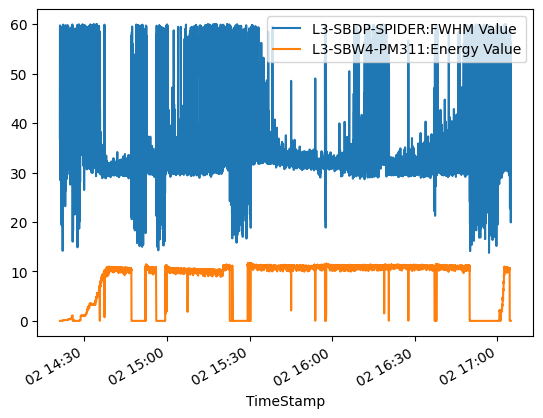

In [100]:
df_merged[df_merged[group_Spider[0]] < 60][group_Spider+ group_OUT].plot()

<Axes: xlabel='TimeStamp'>

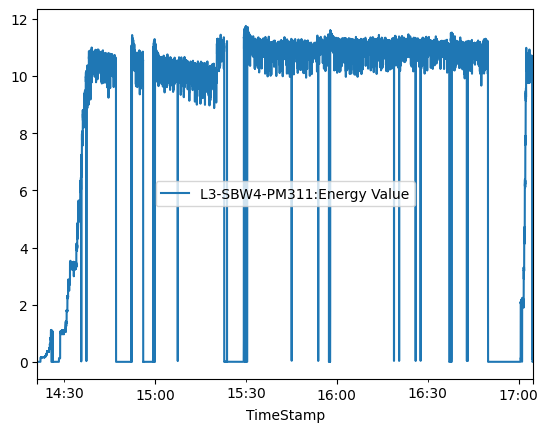

In [101]:
df_merged[group_OUT].plot()

In [6]:
from scipy.signal import find_peaks, peak_prominences


peaks, _ = find_peaks(df_merged[group_OUT[0]], prominence=(df_merged[group_OUT[0]].max()-df_merged[group_OUT[0]].min())/2)
prominences = peak_prominences(df_merged[group_OUT[0]], peaks)[0]

# Find the peaks with a minimum prominence of 10
min_prominence = 10
peaks_filtered = [peaks[i] for i in range(len(peaks)) if prominences[i] >= min_prominence]

# Display the peak indices
print(peaks_filtered)

[32262, 35876, 62135, 62605, 76622, 77003, 77436, 77774, 121055, 125232, 136838, 137382, 137388, 137706, 138807, 184933, 192164, 193483, 236255, 245029, 251256, 263165, 273097, 273708, 283915, 283919, 295976, 322872]


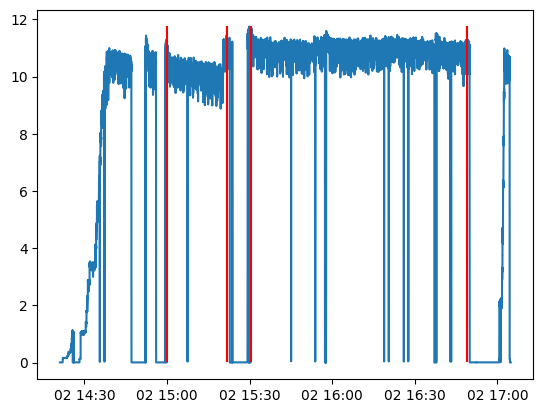

In [7]:
import matplotlib.pyplot as plt

#separate in two main beam
plt.plot(df_merged[group_OUT[0]])
peaks = np.array(peaks_filtered)[[7, 8, 14, 26]]
plt.vlines(df_merged.iloc[peaks].index, ymin=df_merged[group_OUT[0]].min(), ymax=df_merged[group_OUT[0]].max(), colors='r')
plt.show()

In [8]:
df_selected = df_merged.loc[(df_merged.index >= df_merged.iloc[peaks].index[0]) & (df_merged.index <= df_merged.iloc[peaks].index[1]) | (df_merged.index >= df_merged.iloc[peaks].index[2]) & (df_merged.index <= df_merged.iloc[peaks].index[3])]
df_selected = df_selected.drop(['L3-SBW4-PM311:Energy Value.1'], axis=1)


In [9]:
df_selected = df_selected[df_selected[group_OUT[0]] > 9]

In [10]:
#train a random forest to predict group_OUT 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#the target
y = df_selected[group_OUT[0]]
#the features
X = df_selected.drop(group_OUT, axis=1)
#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#create the model
regr = RandomForestRegressor(max_depth=5, random_state=0)
#train the model
regr.fit(X_train, y_train)
#predict
y_pred = regr.predict(X_test)
#evaluate
print(mean_squared_error(y_test, y_pred))
#score
regr.score(X_test, y_test)
#features importance
print(regr.feature_importances_)

0.0037435339907608473
[7.98467482e-06 2.76890273e-05 8.07448243e-06 4.96488399e-03
 8.04067965e-06 4.43374949e-05 1.01356623e-05 7.12972914e-02
 9.23123623e-01 4.25247568e-04 2.35926928e-05 7.11151727e-06
 4.45031811e-06 0.00000000e+00 0.00000000e+00 5.54611268e-06
 2.52385834e-05 0.00000000e+00 0.00000000e+00 1.67533058e-05
 0.00000000e+00 0.00000000e+00]


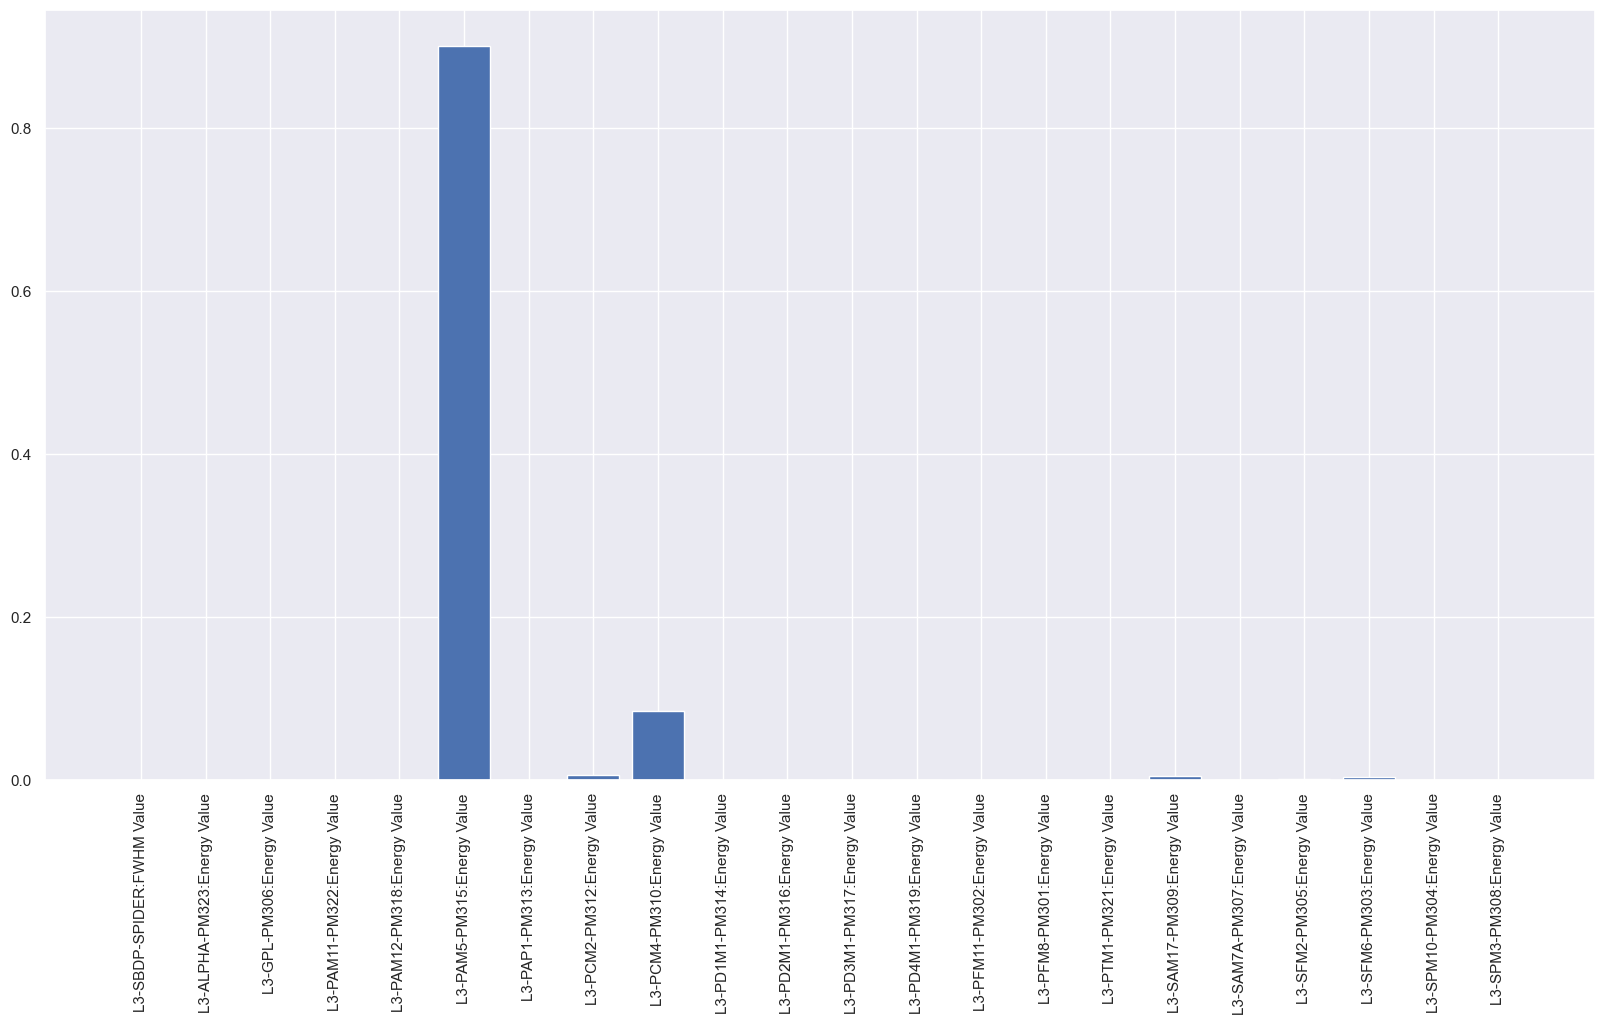

In [294]:
# bar plot features importance regr.feature_importances_
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20,10))
plt.bar(X.columns, regr.feature_importances_)
plt.xticks(rotation=90)
plt.show()


In [79]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]
input_chunk_length = 24
forecast_horizon = 12
model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=16,
    n_epochs=300,
    add_relative_index=False,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
)

In [77]:
df_selected = df_selected.resample('30L').mean()
df_selected = df_selected.interpolate()
series = TimeSeries.from_dataframe(df_selected)
train, val = series.split_after(0.8)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transformer = Scaler(scaler)
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

future_covariates_tr = train_transformed.drop_columns(group_OUT)
future_covariates_val = val_transformed.drop_columns(group_OUT)

target_tr = train_transformed[group_OUT]
target_val = val_transformed[group_OUT]


In [ ]:
model.fit(target_tr, future_covariates=future_covariates_tr, verbose=True)

# SVR

In [45]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#the target
y = df_selected[group_OUT[0]]
#the features
X = df_selected.drop(group_OUT, axis=1)
#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#create the model
regr = SVR(kernel='rbf')
#train the model
regr.fit(X_train, y_train)
#predict
y_pred = regr.predict(X_test)
#evaluate
print(mean_squared_error(y_test, y_pred))

0.0021017954390278233


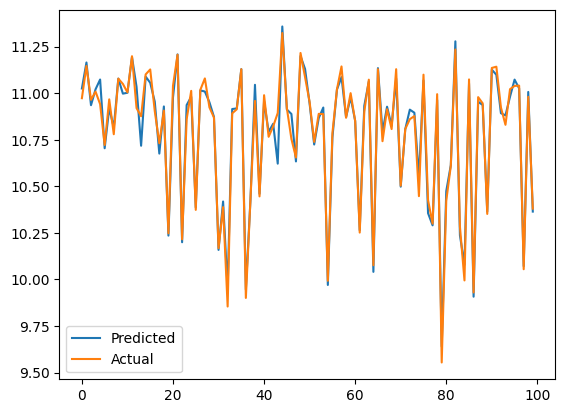

In [48]:
import matplotlib.pyplot as plt
plt.plot(y_pred[:100], label='Predicted')
plt.plot(y_test[:100].values, label='Actual')
plt.legend()
plt.show()
